# Task 1: Investigate and analyze price data
You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.

- Download the monthly natural gas price data.
- Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
- Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
- Your code should take a date as input and return a price estimate.
  
Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your completed code below.

# Import Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

# Read Data

In [5]:
df = pd.read_csv("./Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


# Summarizing and Understanding Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [11]:
df.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


# Preprocess Data

In [16]:
# Load data
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)

C:\Users\tinot\AppData\Local\Temp\ipykernel_33788\1122996984.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [18]:
df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


# Visualize Data

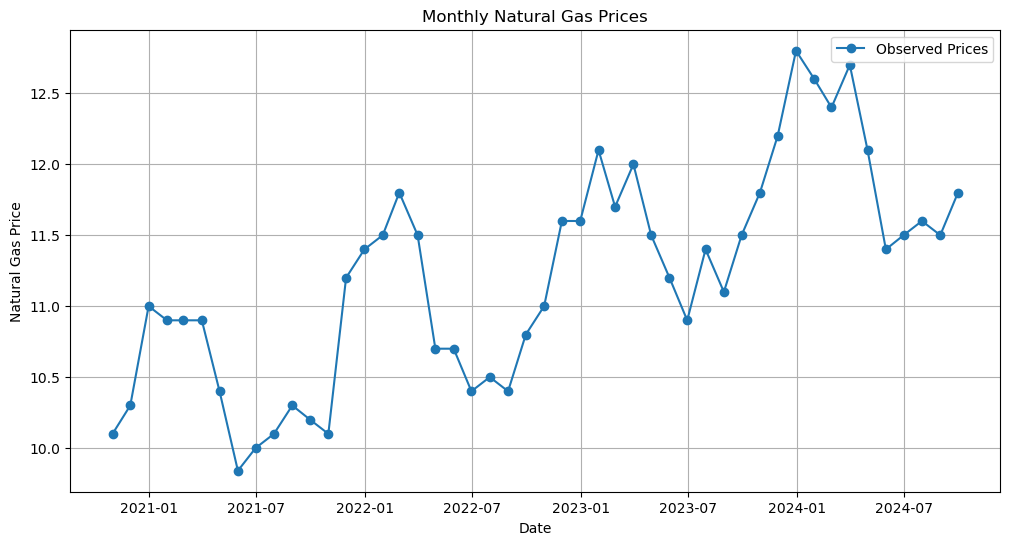

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], marker='o', linestyle='-', label='Observed Prices')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('Monthly Natural Gas Prices')
plt.legend()
plt.grid()
plt.show()

C:\Users\tinot\AppData\Local\Temp\ipykernel_33788\3261105830.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index.month, y=df['Prices'], ci=None)
C:\Users\tinot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tinot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


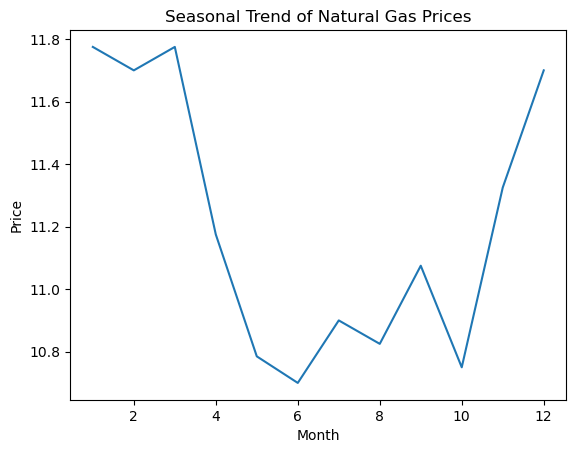

In [64]:
# Seasonal decomposition
sns.lineplot(x=df.index.month, y=df['Prices'], ci=None)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Seasonal Trend of Natural Gas Prices')
plt.show()

# Interpolate Past Prices
- Use time-series interpolation for missing dates.

In [30]:
# Fit an Exponential Smoothing model
model = ExponentialSmoothing(df['Prices'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

C:\Users\tinot\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [32]:
# Generate future dates and forecast
future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast = fitted_model.forecast(12)

# Forecast Future Prices
- Use a time-series model (ARIMA, Exponential Smoothing, or Linear Regression) to extrapolate prices for one year.

In [34]:
# Append forecast to dataframe
forecast_df = pd.DataFrame({'Dates': future_dates, 'Prices': forecast})
forecast_df.set_index('Dates', inplace=True)

In [36]:
# Combine past and future data
full_df = pd.concat([df, forecast_df])

In [66]:
full_df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


# Visualizing Forecast

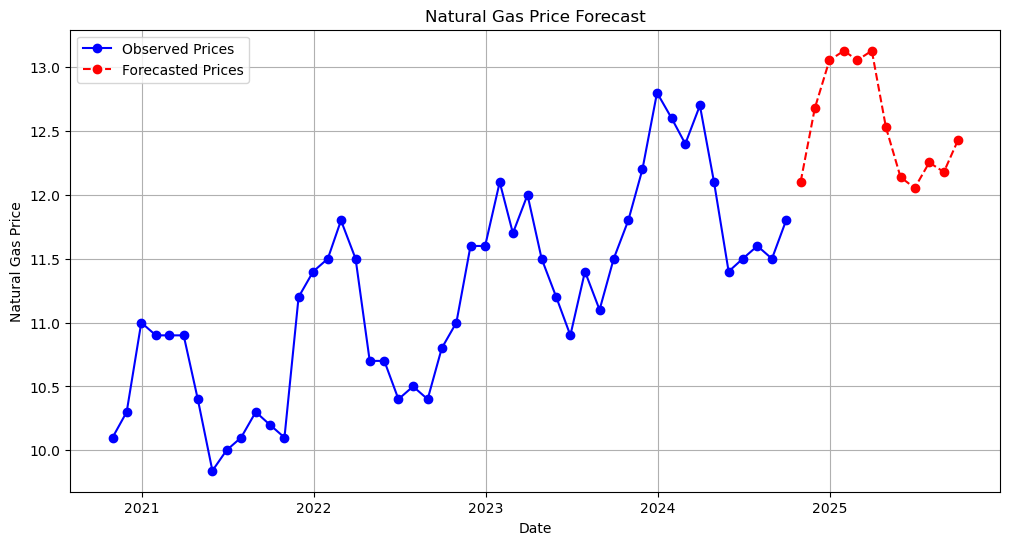

In [69]:
# Visualizing forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], marker='o', linestyle='-', label='Observed Prices', color='blue')
plt.plot(forecast_df.index, forecast_df['Prices'], marker='o', linestyle='--', label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('Natural Gas Price Forecast')
plt.legend()
plt.grid()
plt.show()

# Build a Query Function
- Allow users to input any date and return an estimated price.

In [42]:
# Function to estimate price for any given date
def estimate_price(date_str):
    date = pd.to_datetime(date_str)
    if date in full_df.index:
        return full_df.loc[date, 'Prices']
    else:
        return np.nan  # No estimate available for out-of-range dates

In [52]:
# Example usage
print(estimate_price('2025-09-30'))  # Querying an estimated price


12.428808344221643
